In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/Data/decision_tree_data.csv'
data = pd.read_csv(file_path)
data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [ ]:
data = data.dropna(axis=0)
data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,6196.000000,6.196000e+03,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,1.068828e+06,9.751097,3101.947708,2.902034,1.576340,1.573596,471.006940,141.568645,1964.081988,-37.807904,144.990201,7435.489509
std,0.971079,6.751564e+05,5.612065,86.421604,0.970055,0.711362,0.929947,897.449881,90.834824,38.105673,0.075850,0.099165,4337.698917
min,1.000000,1.310000e+05,0.000000,3000.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1196.000000,-38.164920,144.542370,389.000000
25%,2.000000,6.200000e+05,5.900000,3044.000000,2.000000,1.000000,1.000000,152.000000,91.000000,1940.000000,-37.855438,144.926198,4383.750000
50%,3.000000,8.800000e+05,9.000000,3081.000000,3.000000,1.000000,1.000000,373.000000,124.000000,1970.000000,-37.802250,144.995800,6567.000000
75%,4.000000,1.325000e+06,12.400000,3147.000000,3.000000,2.000000,2.000000,628.000000,170.000000,2000.000000,-37.758200,145.052700,10175.000000
max,8.000000,9.000000e+06,47.400000,3977.000000,9.000000,8.000000,10.000000,37000.000000,3112.000000,2018.000000,-37.457090,145.526350,21650.000000


In [ ]:
y = data.Price

In [ ]:
features = ['Rooms', 'Bathroom', 'Landsize', 'YearBuilt', 'Postcode']
x = data[features]
x.head()

,Rooms,Bathroom,Landsize,YearBuilt,Postcode
1,2,1.0,156.0,1900.0,3067.0
2,3,2.0,134.0,1900.0,3067.0
4,4,1.0,120.0,2014.0,3067.0
6,3,2.0,245.0,1910.0,3067.0
7,2,1.0,256.0,1890.0,3067.0


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

model = DecisionTreeRegressor(random_state=1)

model.fit(x, y)

DecisionTreeRegressor(random_state=1)

In [ ]:
print(x.head())
print(y.head())

print(model.predict(x.head()))

   Rooms  Bathroom  Landsize  YearBuilt  Postcode
1      2       1.0     156.0     1900.0    3067.0
2      3       2.0     134.0     1900.0    3067.0
4      4       1.0     120.0     2014.0    3067.0
6      3       2.0     245.0     1910.0    3067.0
7      2       1.0     256.0     1890.0    3067.0
1    1035000.0
2    1465000.0
4    1600000.0
6    1876000.0
7    1636000.0
Name: Price, dtype: float64
[1035000. 1465000. 1600000. 1876000. 1636000.]


In [ ]:
new_house = pd.DataFrame(data=[[5, 3.0, 256.0, 1910, 3067.0], [2, 1, 128, 1900, 3067]], columns=['Rooms', 'Bathroom', 'Landsize', 'YearBuilt', 'Postcode'])
#new_house = pd.DataFrame.from_dict({'Rooms': [5, 2], 'Bathroom': [3.0, 1], 'Landsize': [256.0, 128], 'YearBuilt': [1910, 1980], 'Postcode': [3067.0, 3067]})
model.predict(new_house)

array([2700000., 1050000.])

In [ ]:
tree.export_text(model)

'|--- feature_0 <= 3.50\n|   |--- feature_3 <= 1949.50\n|   |   |--- feature_0 <= 2.50\n|   |   |   |--- feature_2 <= 68.00\n|   |   |   |   |--- feature_0 <= 1.50\n|   |   |   |   |   |--- feature_4 <= 3195.00\n|   |   |   |   |   |   |--- feature_4 <= 3007.00\n|   |   |   |   |   |   |   |--- feature_4 <= 3002.50\n|   |   |   |   |   |   |   |   |--- feature_3 <= 1925.00\n|   |   |   |   |   |   |   |   |   |--- value: [570000.00]\n|   |   |   |   |   |   |   |   |--- feature_3 >  1925.00\n|   |   |   |   |   |   |   |   |   |--- value: [750000.00]\n|   |   |   |   |   |   |   |--- feature_4 >  3002.50\n|   |   |   |   |   |   |   |   |--- value: [516000.00]\n|   |   |   |   |   |   |--- feature_4 >  3007.00\n|   |   |   |   |   |   |   |--- feature_4 <= 3041.00\n|   |   |   |   |   |   |   |   |--- feature_3 <= 1904.00\n|   |   |   |   |   |   |   |   |   |--- value: [310000.00]\n|   |   |   |   |   |   |   |   |--- feature_3 >  1904.00\n|   |   |   |   |   |   |   |   |   |--- valu

[Text(0.5559799058558371, 0.984375, 'Rooms <= 3.5\nsquared_error = 455762632164.557\nsamples = 6196\nvalue = 1068828.202'),
 Text(0.26189775341412824, 0.953125, 'YearBuilt <= 1949.5\nsquared_error = 231091546371.61\nsamples = 4600\nvalue = 892052.488'),
 Text(0.0785662745784186, 0.921875, 'Rooms <= 2.5\nsquared_error = 224793147858.13\nsamples = 1177\nvalue = 1240609.737'),
 Text(0.02516553132169639, 0.890625, 'Landsize <= 68.0\nsquared_error = 113488800282.437\nsamples = 457\nvalue = 992509.759'),
 Text(0.004283195428425759, 0.859375, 'Rooms <= 1.5\nsquared_error = 69338559196.074\nsamples = 84\nvalue = 726657.738'),
 Text(0.001168385609737963, 0.828125, 'Postcode <= 3195.0\nsquared_error = 37895738754.325\nsamples = 17\nvalue = 506764.706'),
 Text(0.0009984386119578955, 0.796875, 'Postcode <= 3007.0\nsquared_error = 16893996093.75\nsamples = 16\nvalue = 469687.5'),
 Text(0.000509840993340202, 0.765625, 'Postcode <= 3002.5\nsquared_error = 14661440000.0\nsamples = 5\nvalue = 584400.0'

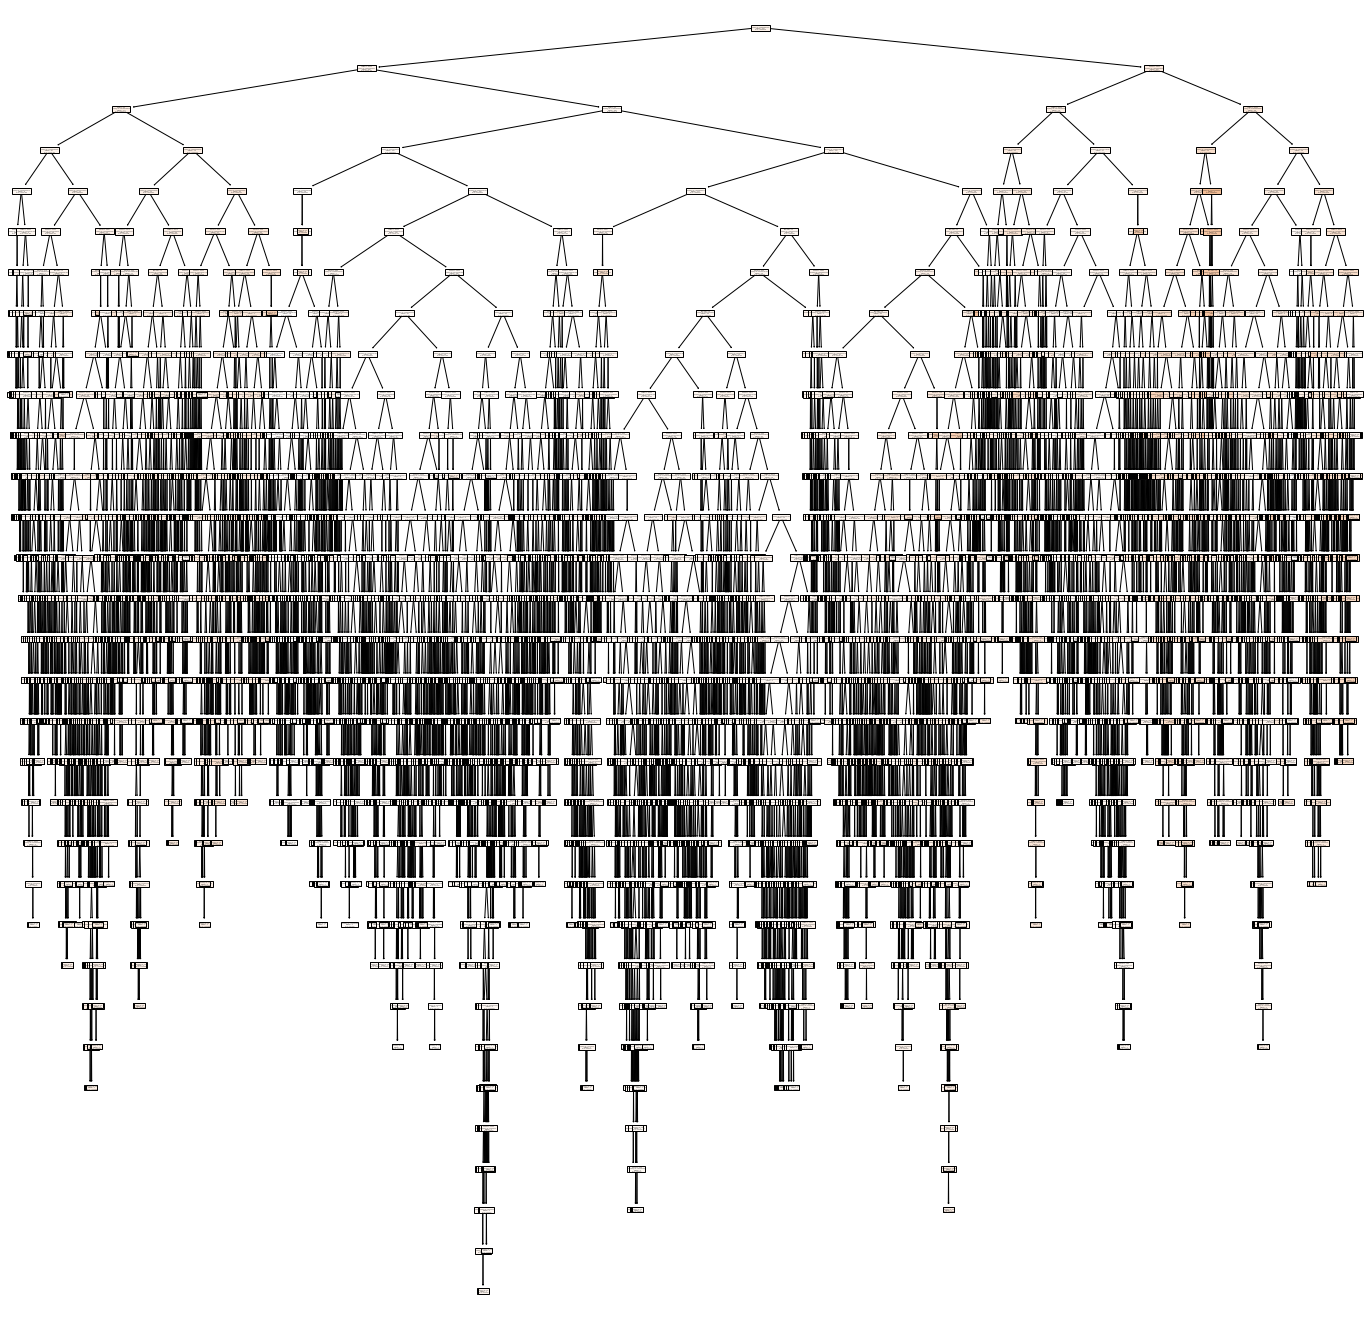

In [48]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(24, 24))
tree.plot_tree(model, feature_names=features, filled=True)